### Basic Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Ingestion Part:

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
print(boston.filename)

C:\Users\Naren\anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [6]:
df['Target'] = boston.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### EDA Part:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [11]:
# x_df = pd.DataFrame(x_train, columns=boston.feature_names)
# # x_df.head(2)
# for feature in boston.feature_names:
#     sns.boxplot(x_df[feature])
#     plt.title(feature)
#     plt.show()

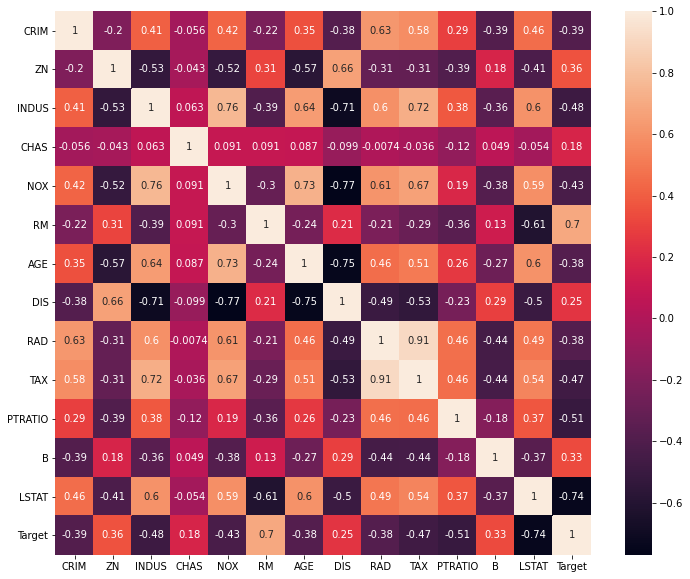

In [12]:
# Correlation: TAX AND RAD are highly correlated.
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

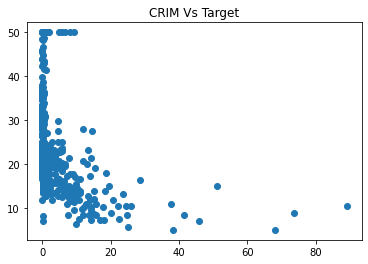

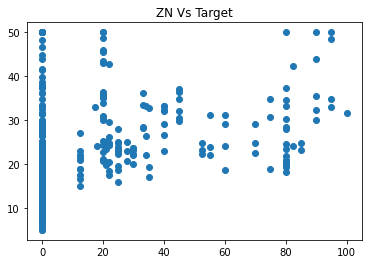

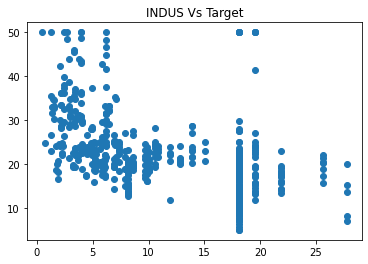

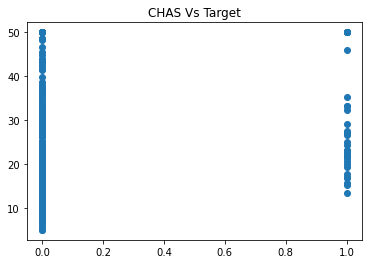

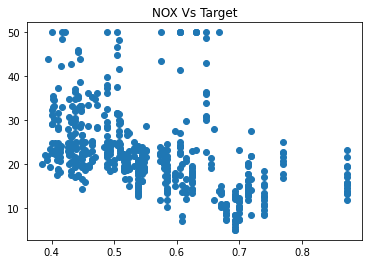

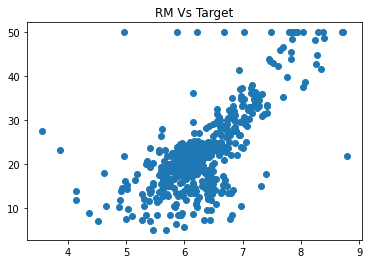

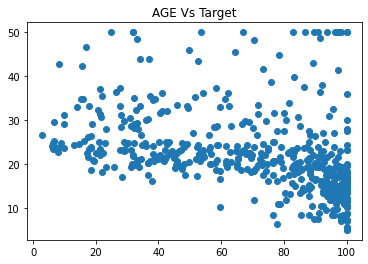

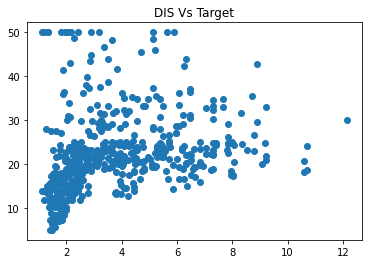

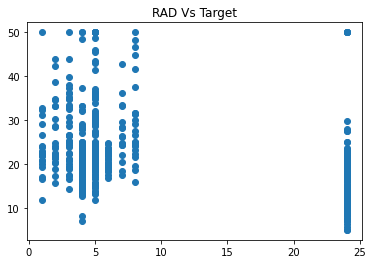

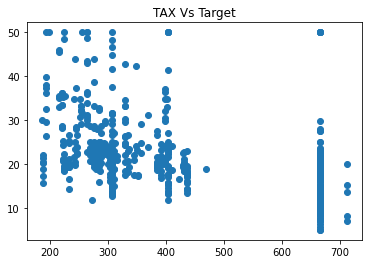

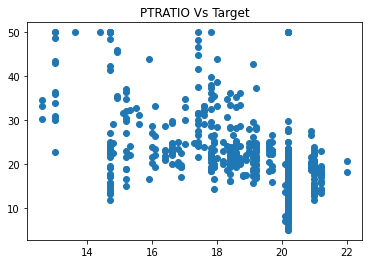

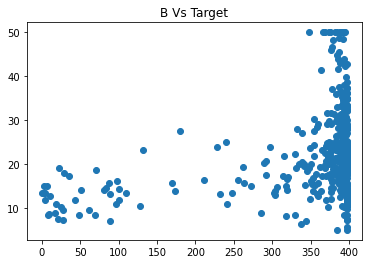

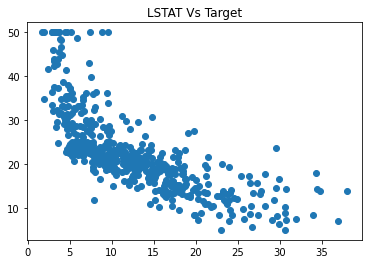

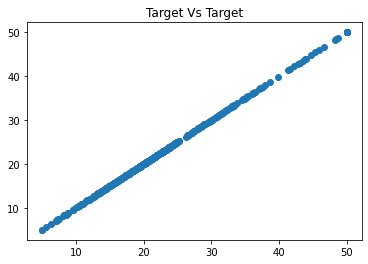

In [13]:
# Relationship between Independent and Dependent Features.
for feature in df.columns:
    plt.scatter(df[feature], df['Target'])
    plt.title(feature + ' Vs Target')
    plt.show()

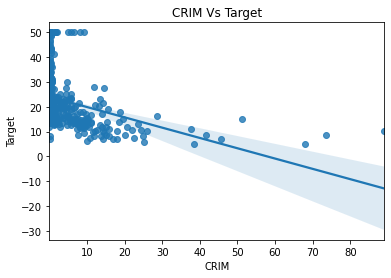

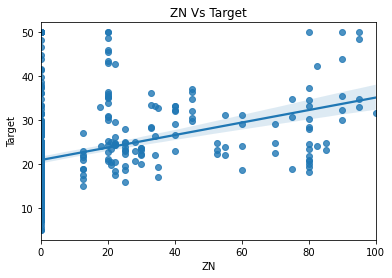

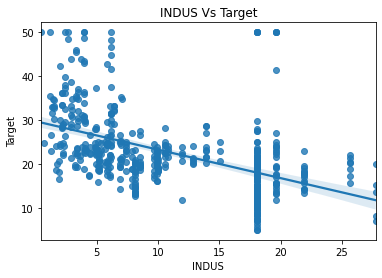

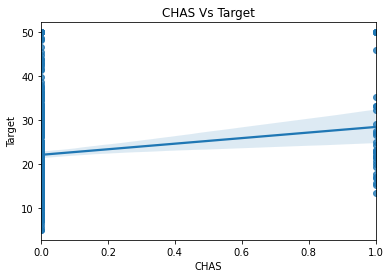

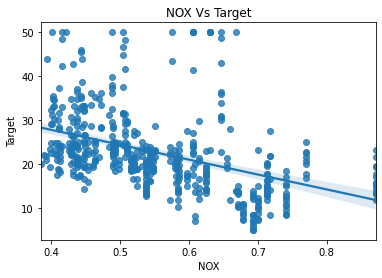

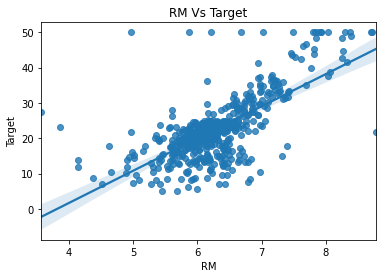

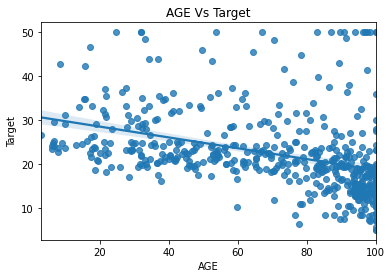

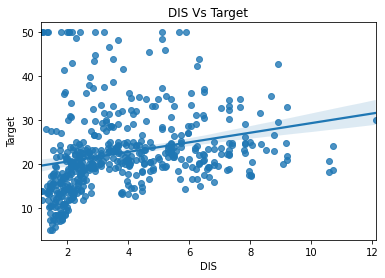

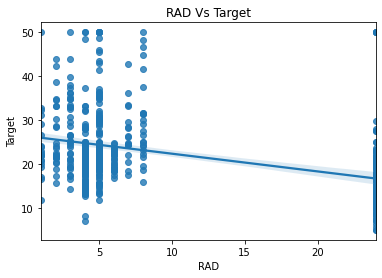

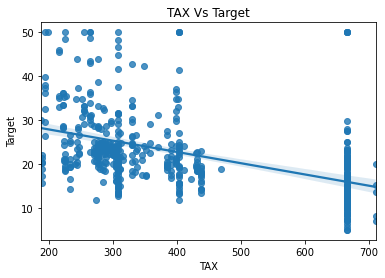

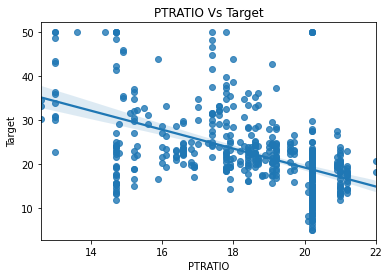

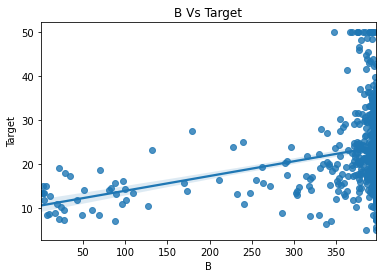

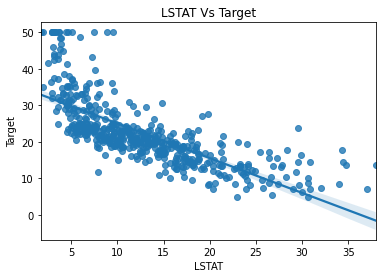

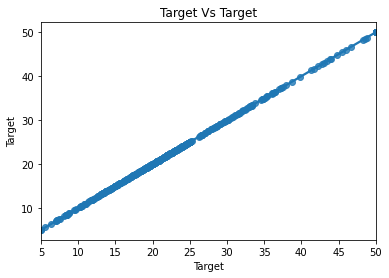

In [14]:
# Regplot:
for feature in df.columns:
    sns.regplot(df[feature], df['Target'])
    plt.title(feature + ' Vs Target')
    plt.show()

### Independent and Dependent Features:

In [15]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Train-Test Split:

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

### Standardize the dataset: x_train and x_test

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
x_train = scaler.fit_transform(x_train)

In [20]:
x_test = scaler.transform(x_test)

### Pickling Feature engineer:

In [21]:
import pickle
pickle.dump(scaler, open('Scaling.pkl', 'wb'))

### Model training:

#### Linear Regression:

In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [23]:
print("Slope values are: ", linear_model.coef_)
print("Intercept: ", linear_model.intercept_)
print()
print(linear_model.get_params())

Slope values are:  [-1.06546379  0.68154987  0.33928836  0.73726309 -1.93178062  3.14172655
 -0.25586276 -2.95561026  2.21416067 -1.65127265 -2.08714915  1.15235744
 -3.69504236]
Intercept:  22.90791556728232

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


#### Ridge Regression:

In [24]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge()

#### Lasso Regression:

In [25]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

#### ElasticNet:

In [26]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet()
elastic_model.fit(x_train, y_train)

ElasticNet()

#### KNN Regression:

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

#### Decision Tree Regression:

In [28]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

#### Random Forest:

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

#### Adaboost:

In [30]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor()
ada_model.fit(x_train, y_train)

AdaBoostRegressor()

#### Gradient Boost:

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
grad_model = GradientBoostingRegressor()
grad_model.fit(x_train, y_train)

GradientBoostingRegressor()

#### Xg Boost:

In [32]:
# import sys
# !{sys.executable} -m pip install xgboost

In [33]:
import xgboost
from xgboost import XGBRegressor
xg_model = XGBRegressor()
xg_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Performance:

In [34]:
models = [linear_model, ridge_model, lasso_model, elastic_model, knn_model, tree_model, rf_model, ada_model, grad_model, xg_model]

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
# Finally Gradient Boost has won!!!
for model in models:
    y_pred = model.predict(x_test)
    print(f"R2 Score of {model}: {r2_score(y_test, y_pred)*100}")
    r2score = r2_score(y_test, y_pred)
    print(f"Adjusted R-2 of {model}: {(1-(1-r2score)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))*100}")
    print()
    

R2 Score of LinearRegression(): 68.44267283527134
Adjusted R-2 of LinearRegression(): 64.8121838694176

R2 Score of Ridge(): 68.41670326524789
Adjusted R-2 of Ridge(): 64.78322664974543

R2 Score of Lasso(): 62.8616376211253
Adjusted R-2 of Lasso(): 58.589082657183965

R2 Score of ElasticNet(): 62.099024559182844
Adjusted R-2 of ElasticNet(): 57.73873534917734

R2 Score of KNeighborsRegressor(): 71.23844635500011
Adjusted R-2 of KNeighborsRegressor(): 67.92959505070809

R2 Score of DecisionTreeRegressor(): 74.63930534363175
Adjusted R-2 of DecisionTreeRegressor(): 71.72170330351858

R2 Score of RandomForestRegressor(): 85.33893119042438
Adjusted R-2 of RandomForestRegressor(): 83.65225955746433

R2 Score of AdaBoostRegressor(): 75.21988946267317
Adjusted R-2 of AdaBoostRegressor(): 72.36908028581257

R2 Score of GradientBoostingRegressor(): 87.32164476774958
Adjusted R-2 of GradientBoostingRegressor(): 85.86307292687121

R2 Score of XGBRegressor(base_score=0.5, booster='gbtree', callba

In [37]:
for model in models:
    y_pred = model.predict(x_test)
    print(f"Mean-Squared error of {model}: {mean_squared_error(y_test, y_pred)}")
    print(f"Mean-Absolute error of {model}: {mean_absolute_error(y_test, y_pred)}")
    print(f"Root_Mean-Squared error of {model}: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print()       

Mean-Squared error of LinearRegression(): 22.09869482709797
Mean-Absolute error of LinearRegression(): 3.0609395954370306
Root_Mean-Squared error of LinearRegression(): 4.700924890603759

Mean-Squared error of Ridge(): 22.11688057520469
Mean-Absolute error of Ridge(): 3.058928601084626
Root_Mean-Squared error of Ridge(): 4.702858766240454

Mean-Squared error of Lasso(): 26.006934373904375
Mean-Absolute error of Lasso(): 3.5117751415021905
Root_Mean-Squared error of Lasso(): 5.0996994395654704

Mean-Squared error of ElasticNet(): 26.540970518317174
Mean-Absolute error of ElasticNet(): 3.460453571020929
Root_Mean-Squared error of ElasticNet(): 5.151792942104445

Mean-Squared error of KNeighborsRegressor(): 20.14089448818898
Mean-Absolute error of KNeighborsRegressor(): 2.556850393700788
Root_Mean-Squared error of KNeighborsRegressor(): 4.4878607919797355

Mean-Squared error of DecisionTreeRegressor(): 17.759370078740154
Mean-Absolute error of DecisionTreeRegressor(): 2.910236220472441
Ro

### Assumptions:

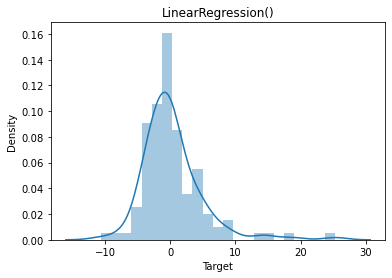

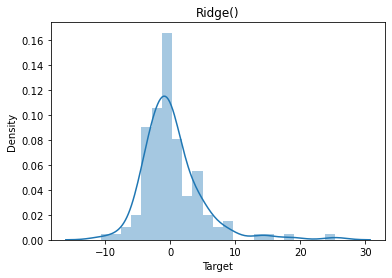

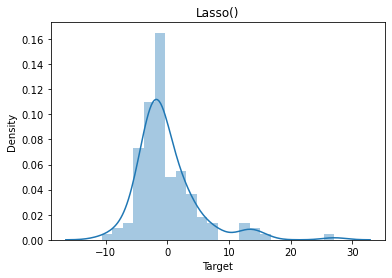

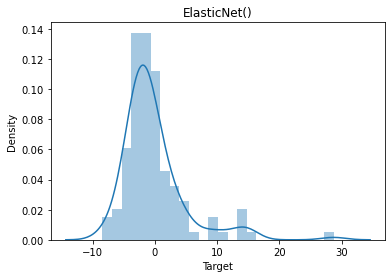

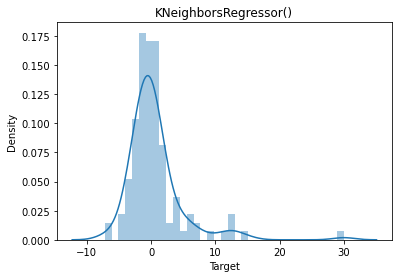

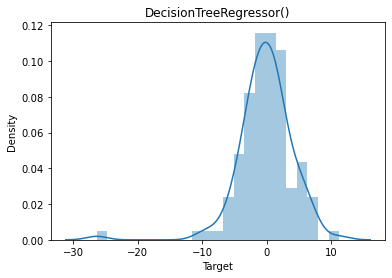

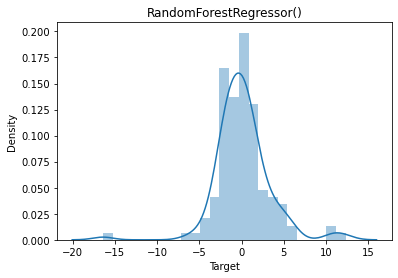

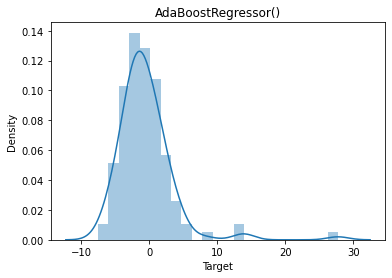

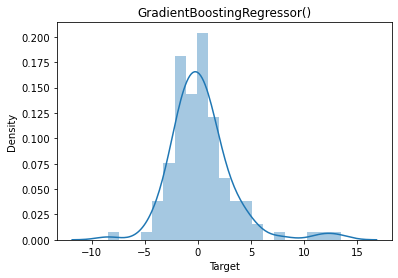

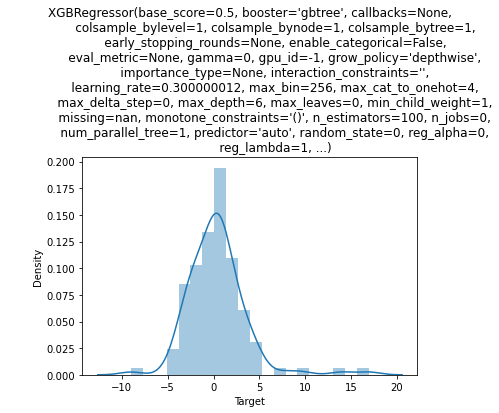

In [38]:
for model in models:
    y_pred = model.predict(x_test)
    residuals = y_test - y_pred
    sns.distplot(residuals)
    plt.title(model)
    plt.show()

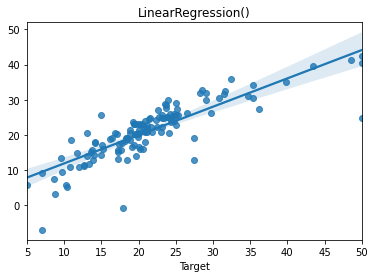

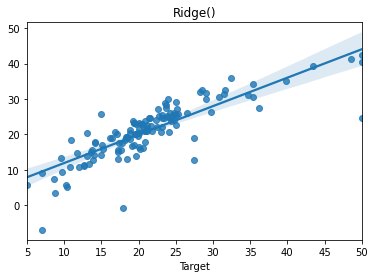

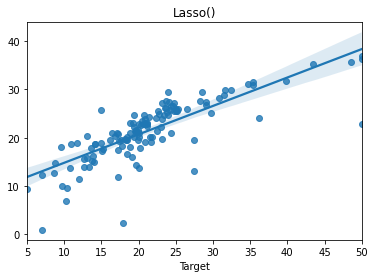

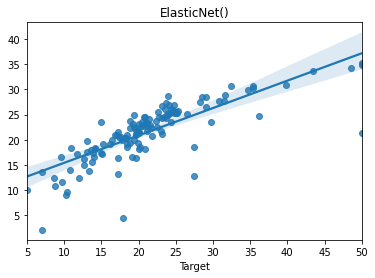

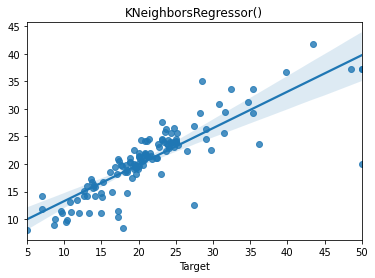

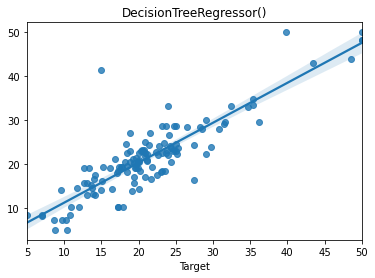

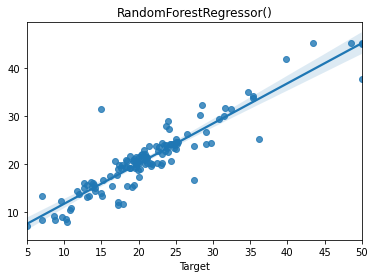

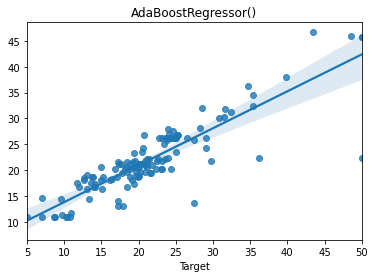

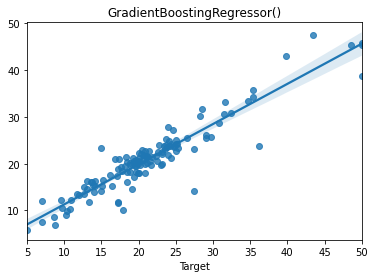

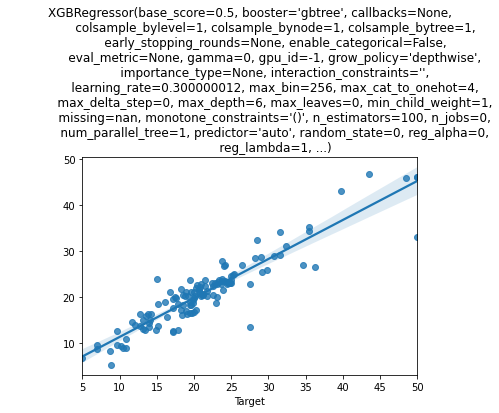

In [39]:
for model in models:
    y_pred = model.predict(x_test)
    sns.regplot(y_test, y_pred)
    plt.title(model)
    plt.show()

### New Data Prediction with Gradient Boost Model:

In [40]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
data ={
  "CRIM": 0.00632,
  "ZN": 18,
  "INDUS": 2.31,
  "CHAS": 0,
  "NOX": 0.538,
  "RM": 6.575,
  "AGE": 65.2,
  "DIS": 4.09,
  "RAD": 1,
  "TAX": 296,
  "PTRATIO": 15.3,
  "B": 396.9,
  "LSTAT": 4.98
}

In [42]:
import numpy as np
np.array(list(data.values())).reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [43]:
new_data = boston.data[0].reshape(1,-1)

In [44]:
new_data = scaler.transform(new_data)

In [45]:
grad_model.predict(new_data)

array([27.80166399])

### Pickling the Model:

In [46]:
import pickle
pickle.dump(grad_model, open("GradModel.pkl", "wb"))

#### Unpickling the Model:

In [47]:
model = pickle.load(open("GradModel.pkl", "rb"))

In [48]:
model.predict(new_data)

array([27.80166399])